In [170]:
import importlib
import graphviz
import graph
import graph_games
import game_solver
from typing import Union
importlib.reload(graph)
importlib.reload(graph_games)
importlib.reload(game_solver)



<module 'game_solver' from '/home/nemo/Graph_Game_Design/game_solver.py'>

In [162]:
def visualize(g: Union[graph.Graph, graph_games.Game]) -> graphviz.Graph:
    if isinstance(g, graph.Graph):
        dot = graphviz.Graph()
        drawn = set()
        for ni in g.nodes:
            dot.attr('node', shape='circle')
            drawn.add(ni)
            dot.node(ni)
            #print(list((ni, nj) for nj in g.edges[ni]))
            dot.edges((ni,nj) for nj in g.edges[ni] if nj in drawn)
        return dot
    if isinstance(g, graph_games.K_DominationGame):
        dot = graphviz.Graph()
        drawn = set()
        print(dot.node_attr)
        for ni in g.graph.nodes:
            if ni in g.dominators:
                dot.attr('node', shape='circle', style='filled', color='pink')
            else:
                dot.attr('node', shape='circle', style='', color='black')
            dot.node(ni, str(g.getUtil(ni)))
            drawn.add(ni)
            dot.edges((ni,nj) for nj in g.graph.neighbors(ni) if nj in drawn)
        dot.attr(label=f'Loss of each Nodes \n ( k={g.k} )')
        return dot



{}


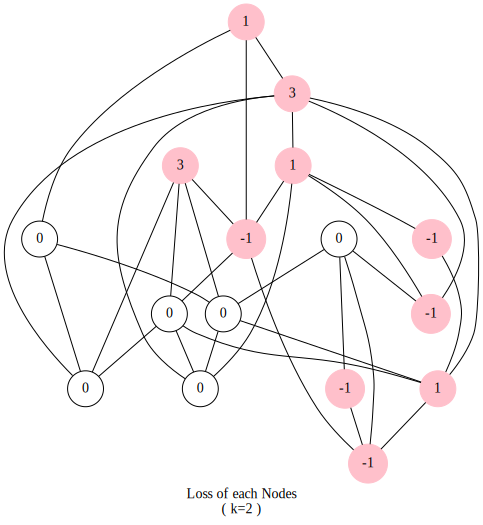

In [163]:
g = graph.randomWSGraph(n=16, k=4, link_rewiring_prob=0.5)
gg = graph_games.K_DominationGame(2, g)
gg.randomInit()
visualize(gg)

{}


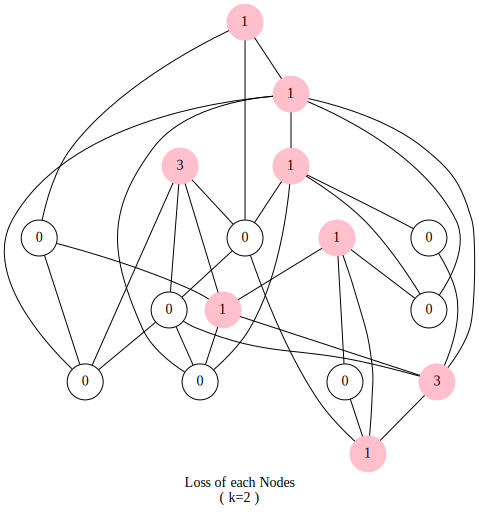

In [164]:
game_solver.bestResponseSolver(gg)
visualize(gg)

In [165]:
gg.checkDomination()

True

{}


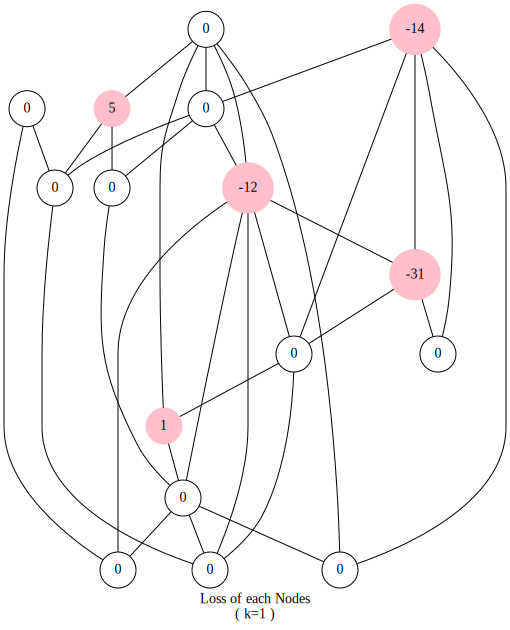

In [166]:
g = graph.randomWSGraph(n=16, k=4, link_rewiring_prob=0.5)
gg = graph_games.AsymmetricIDSGame(g)
gg.randomInit()
visualize(gg)

{}


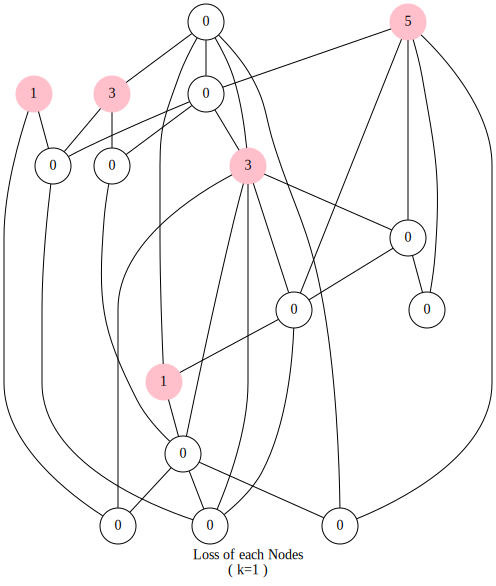

In [167]:
gg.solve(game_solver.bestResponseSolver)
visualize(gg)

In [168]:
print(gg.checkDomination())
print(gg.checkIndependence())

True
True


In [174]:
import graph
from game_solver import bestResponseSolver
from graph_games import K_DominationGame, AsymmetricIDSGame
from matplotlib import pyplot as plt
result = {}
for game in ["K_DominationGame", "AsymmectricIDSGame"]: 
    print("-"*30)
    print(f'Game = {game}')
    print(f'{"rewiring_prob":15}, {"move_counts per node":20}, {"cardinality":15}')
    rp = []
    mc = []
    cd = []
    for rewire_prob_times_10 in range(0, 10, 2):
        rewiring_prob = rewire_prob_times_10 / 10
        move_counts = []
        cardinalities = []
        for i in range(100):
            g = graph.randomWSGraph(n=30, k=4, link_rewiring_prob=rewiring_prob)
            if game == "K_DominationGame":
                gg = K_DominationGame(2, g) # run with k = 2
            else: 
                gg = AsymmetricIDSGame(g)
            
            move_count = gg.solve(bestResponseSolver)
            cardinality = gg.dominationSetCardinality()
            move_counts.append(move_count)
            cardinalities.append(cardinality)
            if game == "K_DominationGame":
                assert gg.checkDomination()
            else:
                assert gg.checkDomination()
                assert gg.checkIndependence() 
        rp.append(rewiring_prob)
        mc.append(sum(move_counts)/100 / 30) # move_count per node, so / 30
        cd.append(sum(cardinalities)/100)
        print(f'{rewiring_prob:15.2f}, {mc[-1]:20.2f}, {cd[-1]:15.2f}')
    result[game] = (rp, mc, cd)   

------------------------------
Game = K_DominationGame
rewiring_prob  , move_counts per node, cardinality    
           0.00,                 0.66,           12.76
           0.20,                 0.77,           13.42
           0.40,                 0.87,           13.65
           0.60,                 0.89,           13.58
           0.80,                 0.91,           13.70
------------------------------
Game = AsymmectricIDSGame
rewiring_prob  , move_counts per node, cardinality    
           0.00,                 0.31,            8.24
           0.20,                 0.35,            9.37
           0.40,                 0.37,           10.12
           0.60,                 0.39,           10.69
           0.80,                 0.40,           11.10


Text(0, 0.5, 'Average move_count per node')

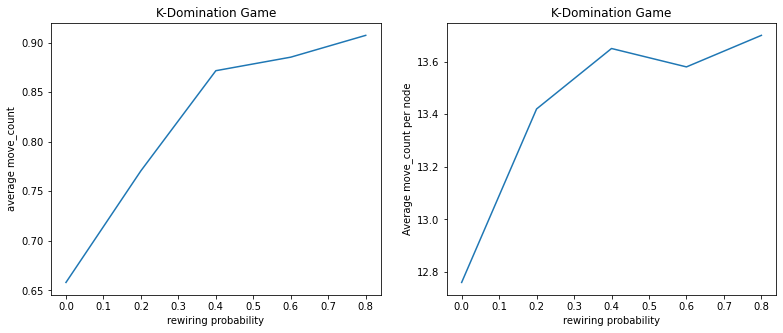

In [183]:
fig = plt.figure(figsize=(13,5))
axs0 = fig.add_subplot(1,2,1)
axs0.plot(result["K_DominationGame"][0], result["K_DominationGame"][1])
axs0.set(title="K-Domination Game")
axs0.set_xlabel("rewiring probability")
axs0.set_ylabel("average move_count")

axs1 = fig.add_subplot(1,2,2)
axs1.plot(result["K_DominationGame"][0], result["K_DominationGame"][2])
axs1.set(title="K-Domination Game")
axs1.set_xlabel("rewiring probability")
axs1.set_ylabel("Average move_count per node")

Text(0, 0.5, 'Average move_count per node')

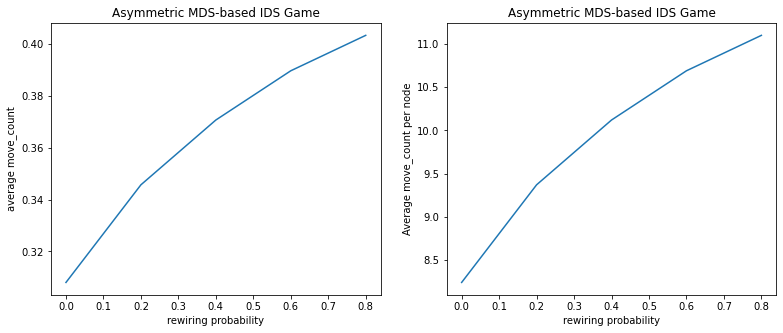

In [184]:
fig = plt.figure(figsize=(13,5))
axs0 = fig.add_subplot(1,2,1)
axs0.plot(result["AsymmectricIDSGame"][0], result["AsymmectricIDSGame"][1])
axs0.set(title="Asymmetric MDS-based IDS Game")
axs0.set_xlabel("rewiring probability")
axs0.set_ylabel("average move_count")

axs1 = fig.add_subplot(1,2,2)
axs1.plot(result["AsymmectricIDSGame"][0], result["AsymmectricIDSGame"][2])
axs1.set(title="Asymmetric MDS-based IDS Game")
axs1.set_xlabel("rewiring probability")
axs1.set_ylabel("Average move_count per node")